# DeepMoji model building

Building DeepMoji models with the labeled YouTube comment data

In [1]:
import pickle
import pandas as pd

In [19]:
# load my labeled comment data
with open('../youtube-data/comments/comments_labeled_mood_py2.pkl') as yt:
    yt_mood_data = pickle.load(yt)

with open('../youtube-data/comments/comments_labeled_content_py2.pkl') as yt2:
    yt_cnt_data = pickle.load(yt2)

In [20]:
yt_cnt_data.head()

,cid,text,time,author,clikes,cdislikes,video_id,desc,category
0,UgxJIXwZLEuc6E4yspJ4AaABAg,i think your name for your youtube accont make...,1 year ago,Tootie Kamins,29,0,-F_JZdohnio,content,delicious
1,Ugznvkcu-l3C8vVY51d4AaABAg,Yummy,1 year ago,Gacha Angelica love,1,0,-F_JZdohnio,content,delicious
2,UgyDtnH9vBdGPbTVShh4AaABAg,Yum😜,1 year ago,Ramandeep Kaur,1,0,-F_JZdohnio,content,delicious
3,Ugz0bOSlg_LfjXOEEpR4AaABAg,That all looks so delicious,1 year ago,andrea gilliane delos santos,1,0,-F_JZdohnio,content,delicious
4,UgwWUJjwfSMTuZxgm354AaABAg,I dont think I can eat any of these,1 year ago,Alexander Bolton,1,0,-F_JZdohnio,content,disgust


In [21]:
# put them into one dataframe
yt_all_data = pd.concat([yt_cnt_data, yt_mood_data], ignore_index=True).reset_index(drop=True)
yt_all_data.head()

,cid,text,time,author,clikes,cdislikes,video_id,desc,category
0,UgxJIXwZLEuc6E4yspJ4AaABAg,i think your name for your youtube accont make...,1 year ago,Tootie Kamins,29,0,-F_JZdohnio,content,delicious
1,Ugznvkcu-l3C8vVY51d4AaABAg,Yummy,1 year ago,Gacha Angelica love,1,0,-F_JZdohnio,content,delicious
2,UgyDtnH9vBdGPbTVShh4AaABAg,Yum😜,1 year ago,Ramandeep Kaur,1,0,-F_JZdohnio,content,delicious
3,Ugz0bOSlg_LfjXOEEpR4AaABAg,That all looks so delicious,1 year ago,andrea gilliane delos santos,1,0,-F_JZdohnio,content,delicious
4,UgwWUJjwfSMTuZxgm354AaABAg,I dont think I can eat any of these,1 year ago,Alexander Bolton,1,0,-F_JZdohnio,content,disgust


In [22]:
# merge categories
yt_merged_data = yt_all_data.groupby(['cid','text','clikes','cdislikes','video_id','desc'], as_index=False).agg({'category': list})
yt_merged_data.head()

,cid,text,clikes,cdislikes,video_id,desc,category
0,Ugg-5o0yT5nqIXgCoAEC,THOSE ARE A LOT OF EGGS!! JUST LIKE IN OUR FAR...,1,0,DFP2mx6i3so,mixed,"[delicious, excitement]"
1,Ugg-5o0yT5nqIXgCoAEC.8LiXVj6rCTa8LlTQuth6hO,you plant eggs too?,2,0,DFP2mx6i3so,content,[question]
2,Ugg-5o0yT5nqIXgCoAEC.8LiXVj6rCTa8MJXbVtXXtf,@vipah wait...you can plant eggs? (in our smal...,1,0,DFP2mx6i3so,mixed,"[incorrect, sarcasm, surprise]"
3,Ugg-6V8MuLiqvHgCoAEC,all i see is stomach ache cause of all the sug...,1,0,-eA48vrLFkQ,mood,[excitement]
4,Ugg-psX2oH0EUngCoAEC,"SO HAPPY I FOUND YOUR CHANNEL, binge watching ...",1,0,-_-BCIMRW3I,mixed,"[entertaining, excitement]"


In [121]:
def pick_cat(cat_list):
    # pick the best category for the comment
    # based on what I need and what will be
    # used
    if 'informative' in cat_list:
        return 'informative'
    elif 'incorrect' in cat_list:
        return 'incorrect'
    elif 'question' in cat_list:
        return 'confused'
    elif 'relaxing' in cat_list:
        return 'relaxed'
    elif 'weird' in cat_list:
        return None
    elif 'funny' in cat_list:
        return None
    elif 'stupid' in cat_list:
        return None
    elif 'disgust' in cat_list:
        return 'disgust'
    elif 'excitement' in cat_list:
        return 'excitement'
    elif 'sarcasm' in cat_list:
        return 'sarcasm'
    elif 'entertaining' in cat_list:
        return 'entertaining'
    elif 'sadness' in cat_list:
        return None
    elif 'annoyance' in cat_list:
        return 'annoyance'
    elif 'delicious' in cat_list:
        return 'delicious'
    elif 'surprise' in cat_list:
        return None
    else:
        return None

In [77]:
# process the categories
yt_merged_data['label'] = yt_merged_data['category'].apply(pick_cat)
yt_merged_data = yt_merged_data.dropna()
yt_merged_data['label'] = pd.Categorical(yt_merged_data['label'])
yt_merged_data.sort_values(by='clikes', ascending=True).head()

,cid,text,clikes,cdislikes,video_id,desc,category,label,label_nums
0,Ugg-5o0yT5nqIXgCoAEC,THOSE ARE A LOT OF EGGS!! JUST LIKE IN OUR FAR...,1,0,DFP2mx6i3so,mixed,"[delicious, excitement]",excitement,5
2519,Ugxurwxm3jRu3mGzmk14AaABAg,Where is that nacho cheese and the meat? Make ...,1,0,CPMnnZFkVfI,mood,"[sarcasm, annoyance]",sarcasm,11
2520,UgxusIiNidkkLngwSLN4AaABAg,U r so digusting eating spiders,1,0,-DZxqe-tDtg,content,[disgust],disgust,3
2522,Ugxv8jud184mZuGemHR4AaABAg,Who else just watches these videos and doesn’t...,1,0,-F_JZdohnio,content,[entertaining],entertaining,4
2523,UgxvFFKsVTG-vK1v5CN4AaABAg,Today I also made and definitely I made by thi...,1,0,2VPaS9w1G2w,mixed,"[delicious, relaxing]",relaxed,10


In [78]:
yt_merged_data['label'].unique()

[excitement, confused, incorrect, entertaining, disgust, sarcasm, relaxed, delicious, annoyance]
Categories (9, object): [excitement, confused, incorrect, entertaining, ..., sarcasm, relaxed, delicious, annoyance]

In [79]:
# convert categories to num labels
yt_merged_data['label_nums'] = yt_merged_data['label'].cat.codes

## Attempt one: all labels

Built a model with 14 different labels just to see how it performs with many.

In [80]:
from __future__ import print_function
from examples import example_helper
import json
from deepmoji.model_def import deepmoji_transfer
from deepmoji.global_variables import PRETRAINED_PATH
from deepmoji.finetuning import (
    load_benchmark,
    finetune)

with open('model/vocabulary.json', 'r') as f:
    vocab = json.load(f)

In [81]:
nb_classes = len(yt_merged_data['label_nums'].unique())

In [66]:
# applying the basics of the load_benchmark function to my data...
from deepmoji.sentence_tokenizer import SentenceTokenizer
from deepmoji.finetuning import calculate_batchsize_maxlen

try:
    texts = [unicode(x) for x in yt_merged_data['text']]
except UnicodeDecodeError:
    texts = [x.decode('utf-8') for x in data['text']]

labels = list(yt_merged_data['label_nums'])

batch_size, maxlen = calculate_batchsize_maxlen(texts)

st = SentenceTokenizer(vocab, maxlen)

texts, labels, added = st.split_train_val_test(texts,labels)
print(added)
data = {'texts': texts,
        'labels': labels,
        'batch_size': batch_size,
        'maxlen': maxlen}

0


In [42]:
# Set up model and finetune
model = deepmoji_transfer(nb_classes, data['maxlen'], PRETRAINED_PATH)
model.summary()

Loading weights for embedding
Loading weights for bi_lstm_0
Loading weights for bi_lstm_1
Loading weights for attlayer
Ignoring weights for softmax
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 256)      12800000    input_2[0][0]                    
__________________________________________________________________________________________________
activation_2 (Activation)       (None, 30, 256)      0           embedding[0][0]                  
__________________________________________________________________________________________________
embed_drop (SpatialDropout1D)   (None, 30, 256)      0      

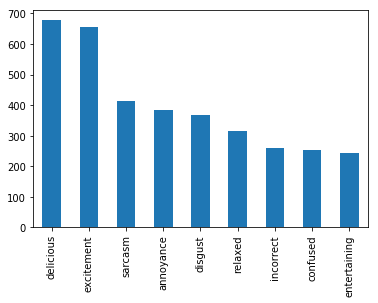

In [82]:
yt_merged_data['label'].value_counts().plot(kind='bar')

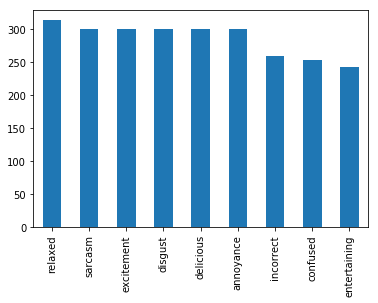

In [83]:
delic = yt_merged_data[yt_merged_data['label'] == 'delicious']
excit = yt_merged_data[yt_merged_data['label'] == 'excitement']
sarc = yt_merged_data[yt_merged_data['label'] == 'sarcasm']
annoy = yt_merged_data[yt_merged_data['label'] == 'annoyance']
disg = yt_merged_data[yt_merged_data['label'] == 'disgust']


yt_merged_data2 = yt_merged_data[yt_merged_data['label'].isin(['relaxed','incorrect','confused','entertaining'])]
yt_merged_data2 = pd.concat([yt_merged_data2, delic.sample(300), excit.sample(300), sarc.sample(300), annoy.sample(300), disg.sample(300)])
yt_merged_data2['label'] = yt_merged_data2['label'].dropna().apply(str)
yt_merged_data2['label'] = pd.Categorical(yt_merged_data2['label'])
yt_merged_data2['label_nums'] = yt_merged_data2['label'].cat.codes
yt_merged_data2['label'].value_counts().plot(kind='bar')

In [43]:
model, acc = finetune(model, data['texts'], data['labels'], nb_classes,
                      data['batch_size'], method='last')
print('Acc: {}'.format(acc))

Method:  last
Metric:  acc
Classes: 14
Trainable weights: [<tf.Variable 'bi_lstm_0_1/forward_lstm_3/kernel:0' shape=(256, 2048) dtype=float32_ref>, <tf.Variable 'bi_lstm_0_1/forward_lstm_3/recurrent_kernel:0' shape=(512, 2048) dtype=float32_ref>, <tf.Variable 'bi_lstm_0_1/forward_lstm_3/bias:0' shape=(2048,) dtype=float32_ref>, <tf.Variable 'bi_lstm_0_1/backward_lstm_3/kernel:0' shape=(256, 2048) dtype=float32_ref>, <tf.Variable 'bi_lstm_0_1/backward_lstm_3/recurrent_kernel:0' shape=(512, 2048) dtype=float32_ref>, <tf.Variable 'bi_lstm_0_1/backward_lstm_3/bias:0' shape=(2048,) dtype=float32_ref>, <tf.Variable 'bi_lstm_1_1/forward_lstm_4/kernel:0' shape=(1024, 2048) dtype=float32_ref>, <tf.Variable 'bi_lstm_1_1/forward_lstm_4/recurrent_kernel:0' shape=(512, 2048) dtype=float32_ref>, <tf.Variable 'bi_lstm_1_1/forward_lstm_4/bias:0' shape=(2048,) dtype=float32_ref>, <tf.Variable 'bi_lstm_1_1/backward_lstm_4/kernel:0' shape=(1024, 2048) dtype=float32_ref>, <tf.Variable 'bi_lstm_1_1/backwar

In [84]:
nb_classes = len(yt_merged_data2['label_nums'].unique())

try:
    texts = [unicode(x) for x in yt_merged_data2['text']]
except UnicodeDecodeError:
    texts = [x.decode('utf-8') for x in data['text']]

labels = list(yt_merged_data['label_nums'])

batch_size, maxlen = calculate_batchsize_maxlen(texts)

st = SentenceTokenizer(vocab, maxlen)

texts, labels, added = st.split_train_val_test(texts,labels)
print(added)
data = {'texts': texts,
        'labels': labels,
        'batch_size': batch_size,
        'maxlen': maxlen}

0


In [85]:
# Set up model and finetune
model2 = deepmoji_transfer(nb_classes, data['maxlen'], PRETRAINED_PATH)
model2.summary()

Loading weights for embedding
Loading weights for bi_lstm_0
Loading weights for bi_lstm_1
Loading weights for attlayer
Ignoring weights for softmax
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 256)      12800000    input_5[0][0]                    
__________________________________________________________________________________________________
activation_5 (Activation)       (None, 30, 256)      0           embedding[0][0]                  
__________________________________________________________________________________________________
embed_drop (SpatialDropout1D)   (None, 30, 256)      0      

In [86]:
model2, acc = finetune(model2, data['texts'], data['labels'], nb_classes,
                      data['batch_size'], method='last')
print('Acc: {}'.format(acc))

Method:  last
Metric:  acc
Classes: 9
Trainable weights: [<tf.Variable 'bi_lstm_0_4/forward_lstm_9/kernel:0' shape=(256, 2048) dtype=float32_ref>, <tf.Variable 'bi_lstm_0_4/forward_lstm_9/recurrent_kernel:0' shape=(512, 2048) dtype=float32_ref>, <tf.Variable 'bi_lstm_0_4/forward_lstm_9/bias:0' shape=(2048,) dtype=float32_ref>, <tf.Variable 'bi_lstm_0_4/backward_lstm_9/kernel:0' shape=(256, 2048) dtype=float32_ref>, <tf.Variable 'bi_lstm_0_4/backward_lstm_9/recurrent_kernel:0' shape=(512, 2048) dtype=float32_ref>, <tf.Variable 'bi_lstm_0_4/backward_lstm_9/bias:0' shape=(2048,) dtype=float32_ref>, <tf.Variable 'bi_lstm_1_4/forward_lstm_10/kernel:0' shape=(1024, 2048) dtype=float32_ref>, <tf.Variable 'bi_lstm_1_4/forward_lstm_10/recurrent_kernel:0' shape=(512, 2048) dtype=float32_ref>, <tf.Variable 'bi_lstm_1_4/forward_lstm_10/bias:0' shape=(2048,) dtype=float32_ref>, <tf.Variable 'bi_lstm_1_4/backward_lstm_10/kernel:0' shape=(1024, 2048) dtype=float32_ref>, <tf.Variable 'bi_lstm_1_4/back

In [118]:
y_pred = model.predict(data['texts'][1]) 
y_pred_c = y_pred.argmax(axis=-1)
y_true = data['labels'][1]

In [119]:
df = pd.DataFrame([y_true, y_pred_c])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,205
0,7,5,2,4,5,2,7,0,4,8,...,0,4,2,8,2,7,7,3,5,6
1,8,2,8,8,6,11,11,4,4,5,...,1,1,8,0,7,12,0,5,2,8


In [120]:
df.to_csv('deepmoji_text.csv')

## Mood-only predictions



In [122]:
yt_mood_data2 = yt_mood_data.groupby(['cid','text','clikes','cdislikes','video_id','desc'], as_index=False).agg({'category': list})
yt_mood_data2.head()


,cid,text,clikes,cdislikes,video_id,desc,category
0,Ugg-5o0yT5nqIXgCoAEC,THOSE ARE A LOT OF EGGS!! JUST LIKE IN OUR FAR...,1,0,DFP2mx6i3so,mixed,[excitement]
1,Ugg-5o0yT5nqIXgCoAEC.8LiXVj6rCTa8MJXbVtXXtf,@vipah wait...you can plant eggs? (in our smal...,1,0,DFP2mx6i3so,mixed,"[sarcasm, surprise]"
2,Ugg-6V8MuLiqvHgCoAEC,all i see is stomach ache cause of all the sug...,1,0,-eA48vrLFkQ,mood,[excitement]
3,Ugg-psX2oH0EUngCoAEC,"SO HAPPY I FOUND YOUR CHANNEL, binge watching ...",1,0,-_-BCIMRW3I,mixed,[excitement]
4,Ugg0VaR4glrTmngCoAEC.8LlP_XWUJHh8LmP5L9fvvL,because egg grown on ground....everybody know ...,2,0,DFP2mx6i3so,mood,[sarcasm]


In [123]:
yt_mood_data2['label'] = yt_mood_data2['category'].apply(pick_cat)
yt_mood_data2 = yt_mood_data2.dropna()
yt_mood_data2['label'] = pd.Categorical(yt_mood_data2['label'])
yt_mood_data2.sort_values(by='clikes', ascending=True).head()

,cid,text,clikes,cdislikes,video_id,desc,category,label
0,Ugg-5o0yT5nqIXgCoAEC,THOSE ARE A LOT OF EGGS!! JUST LIKE IN OUR FAR...,1,0,DFP2mx6i3so,mixed,[excitement],excitement
1457,UgxhnwQiHUKi8uOXXQJ4AaABAg,ewwww who puts sour cream in cake batter,1,0,-F_JZdohnio,mixed,[annoyance],annoyance
1456,UgxhKW5OJ7KYxwzC17p4AaABAg,All those 1.4k peoples dislikes are going to hell,1,0,-WvX5Bj9liE,mood,[sarcasm],sarcasm
1455,UgxhHLhAVTiAhe0FW814AaABAg,"Everyone, make sure you subscribe to Grandpa!!",1,0,CPMnnZFkVfI,mood,[excitement],excitement
1454,UgxhE_tDaEMf7kDNSCJ4AaABAg,So satisfyingly,1,0,-F_JZdohnio,mood,[relaxing],relaxed


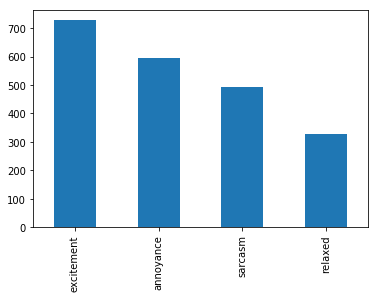

In [124]:
yt_mood_data2['label_nums'] = yt_mood_data2['label'].cat.codes
nb_classes = len(yt_mood_data2['label_nums'].unique())
yt_mood_data2['label'].value_counts().plot(kind='bar')

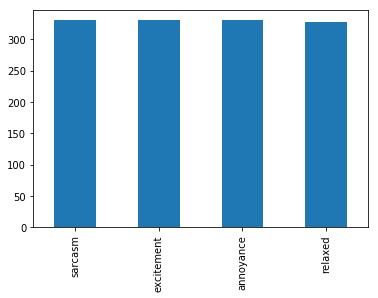

In [133]:
excit = yt_mood_data2[yt_mood_data2['label'] == 'excitement']
sarc = yt_mood_data2[yt_mood_data2['label'] == 'sarcasm']
annoy = yt_mood_data2[yt_mood_data2['label'] == 'annoyance']
relax = yt_mood_data2[yt_mood_data2['label'] == 'relaxed']

yt_mood_data3 = pd.concat([relax, excit.sample(330), sarc.sample(330), annoy.sample(330)])
yt_mood_data3['label'] = yt_mood_data3['label'].dropna().apply(str)
yt_mood_data3['label'] = pd.Categorical(yt_mood_data3['label'])
yt_mood_data3['label_nums'] = yt_mood_data3['label'].cat.codes
yt_mood_data3['label'].value_counts().plot(kind='bar')

In [135]:
try:
    texts = [unicode(x) for x in yt_mood_data3['text']]
except UnicodeDecodeError:
    texts = [x.decode('utf-8') for x in data['text']]

labels = list(yt_mood_data3['label_nums'])

batch_size, maxlen = calculate_batchsize_maxlen(texts)

st = SentenceTokenizer(vocab, maxlen)

texts, labels, added = st.split_train_val_test(texts,labels)
print(added)
data = {'texts': texts,
        'labels': labels,
        'batch_size': batch_size,
        'maxlen': maxlen}

0


In [136]:
# Set up model and finetune
model3 = deepmoji_transfer(nb_classes, data['maxlen'], PRETRAINED_PATH)
model3.summary()

model3, acc = finetune(model3, data['texts'], data['labels'], nb_classes,
                      data['batch_size'], method='last')
print('Acc: {}'.format(acc))

Loading weights for embedding
Loading weights for bi_lstm_0
Loading weights for bi_lstm_1
Loading weights for attlayer
Ignoring weights for softmax
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 256)      12800000    input_9[0][0]                    
__________________________________________________________________________________________________
activation_9 (Activation)       (None, 30, 256)      0           embedding[0][0]                  
__________________________________________________________________________________________________
embed_drop (SpatialDropout1D)   (None, 30, 256)      0      

In [145]:
y_pred = model3.predict(data['texts'][1]) 
y_pred_c = y_pred.argmax(axis=-1)
y_true = data['labels'][1]

df = pd.DataFrame([y_true, y_pred_c])
df.to_csv('deepmoji_text_2.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,3,1,2,2,3,3,3,0,2,0,...,2,2,1,0,1,3,3,1,1,3
1,3,1,1,2,3,1,3,0,2,0,...,2,2,1,2,1,3,3,1,1,3


In [147]:
model3.save('mood_model_3_deepmoji.h5')

In [161]:
from keras.models import load_model
import deepmoji

modell = load_model('mood_model_3_deepmoji.h5', 
                  custom_objects={'AttentionWeightedAverage': deepmoji.attlayer.AttentionWeightedAverage})

## Mood + Content predictions

Merging the major overlapping categories together...

In [155]:
data['maxlen']

30

In [156]:
data['batch_size']

250

In [159]:
yt_mood_data3.sample(10)

,cid,text,clikes,cdislikes,video_id,desc,category,label,label_nums
1011,UgwdJkU79lbJ89r4fnZ4AaABAg.8gTzNh_u5uk8m4z0JzhdER,They are human....they just have NO SOULS!!,4,0,CYfKRjAhdNc,mood,[annoyance],annoyance,0
1906,UgyseIyoSBzvyWByYv94AaABAg,Why would anyone hate or dislike it,1,0,CYfKRjAhdNc,mood,[annoyance],annoyance,0
1893,Ugyq7fPpvwiE5LIAstV4AaABAg,my italian heart is broken,1,0,9XjNCCYmWew,mixed,[sarcasm],sarcasm,3
1912,UgytR04Kdheq3H0xDvN4AaABAg,713 perhaps very selfish people ! Their eyes c...,3,0,CYfKRjAhdNc,mood,[annoyance],annoyance,0
1426,UgxcdH7U6Jh9HokvvbN4AaABAg,I love this 🤗😍❤,2,0,AxBvzhxF3Hk,mood,[relaxing],relaxed,2
2095,UgzM4GNIE2xMxy05vrt4AaABAg,I love to give you my happiness,1,0,-WvX5Bj9liE,mood,[relaxing],relaxed,2
354,UghrvJmo92pdAngCoAEC.8KTYRsyFONm8KToKgNSue0,Chantelle K Me too!,1,0,-eA48vrLFkQ,mood,[excitement],excitement,1
1567,UgxyRNG-Ka19AXVJATd4AaABAg,Oh my goodness✨👍😋\nThat looks so good😁\nGod...,1,0,-EU3-byQtZo,mixed,[excitement],excitement,1
1025,UgwfFYoBw2KWwils33l4AaABAg,A!!! Grandpa you are the best\nWe all lo...,2,0,-WvX5Bj9liE,mood,[excitement],excitement,1
1847,UgygI-uBNPtl6xq8rox4AaABAg,You should make an anniversary cake when its y...,1,0,-eBX9vnG5lg,mood,[excitement],excitement,1


In [163]:
import pandas as pd
import numpy as np

# Step 1: Process comments

# We'll operate on a single csv file then extend to all of them.
filename = "../youtube-data/label-app/data/filtered/filtered_comments_set_533.csv"
df = pd.read_csv(filename, index_col=0)
df.sort_values(by='clikes', ascending=False).head()

,cid,text,time,author,clikes,cdislikes,video_id,desc,category,lang
173,UgxLdrxL9M7QS9hcG-B4AaABAg,I watch these like I’m actually going to even ...,8 months ago,Umar Ahmad,1706,0,1i_hs2-VYOU,-,-,en
122,UgzXbPauCtgqh70dTIZ4AaABAg,"Food is so beautiful to me, no matter what rel...",8 months ago (edited),01emercado01,927,0,1i_hs2-VYOU,-,-,en
254,UgwWQziec5aPXNjheip4AaABAg,I I just love pasta in general. It's so soft y...,8 months ago,01emercado01,575,0,1i_hs2-VYOU,-,-,en
151,UgzZEtAOKC6cbiNENO14AaABAg,The kind of quality content I subscribed to Ta...,8 months ago,Jacelyn,508,0,1i_hs2-VYOU,-,-,en
276,UgwOmH8No4ofddRYigx4AaABAg,I love these types of videos!😂,8 months ago,liza galstyan,357,0,1i_hs2-VYOU,-,-,en


In [164]:
from __future__ import print_function, division
import examples.example_helper
import json
import csv
import numpy as np
from deepmoji.sentence_tokenizer import SentenceTokenizer
from deepmoji.global_variables import PRETRAINED_PATH, VOCAB_PATH
from deepmoji.finetuning import calculate_batchsize_maxlen

def top_elements(array, k):
    ind = np.argpartition(array, -k)[-k:]
    return ind[np.argsort(array[ind])][::-1]

# tokenize text
try:
    texts = [unicode(x) for x in df['text']]
except UnicodeDecodeError:
    texts = [x.decode('utf-8') for x in df['text']]

batch_size, maxlen = calculate_batchsize_maxlen(texts)

with open(VOCAB_PATH, 'r') as f:
    vocab = json.load(f)
st = SentenceTokenizer(vocab, 30)

tokenized, _, _ = st.tokenize_sentences(texts)